# Analyze the Feed axis data

### Q1 a81nxはどんな機械か？調査せよ / What kind of machine is a81nx? Investigate.
  - 横形マシニングセンタ
  - BT50主軸（特別仕様：HSK- A100）
  - 機体寸法：3710mm × 5605mm
  - パレット寸法：□630mm
  - 各軸最大移動量：(X, Y, Z) = (900, 900, 1020) mm
  - 主軸回転速度：20 ～ 10000 min<sup>-1</sup>
  - 早送り速度：50000 mm/min

### Q2 X軸、Y軸、Z軸往復動作それぞれトルク平均値について、ヒストグラムを作成せよ<br>
Make a histogram for each of the X-axis, Y-axis, Z-axis. <br>
データ…C95_a81nx_WDAx02_TCMDA.csv

まずモジュールを読み込む

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

目的のCSVファイルをpandasのdataframe形式で読み込む

In [ ]:
df_csv = pd.read_csv('C95_a81nx_WDAx02_TCMDA.csv', index_col=0)

pandasのdataframeの先頭5行を出力する

In [ ]:
df_csv.head()

,SN,date,axis,scale,section,TCMD-A-1,TCMD-A-2
0,465,2017/11/25,X,1,2,5.401357,-5.077860
1,465,2017/11/25,Y,1,2,20.205510,13.520459
2,465,2017/11/25,Z,1,2,3.759887,-3.502716
3,475,2017/12/5,X,1,2,5.031119,-4.736860
4,475,2017/12/5,Y,1,2,15.270975,8.562764


ヒストグラムを作成する

In [ ]:
df = pd.DataFrame({"x1": df_csv.iloc[0::3, -2],
                   "y1": df_csv.iloc[1::3, -2],
                   "z1": df_csv.iloc[2::3, -2],
                   "x2": df_csv.iloc[0::3, -1],
                   "y2": df_csv.iloc[1::3, -1],
                   "z2": df_csv.iloc[2::3, -1]})
df.head()

,x1,y1,z1,x2,y2,z2
0,5.401357,NaN,NaN,-5.07786,NaN,NaN
1,NaN,20.205510,NaN,NaN,13.520459,NaN
2,NaN,NaN,3.759887,NaN,NaN,-3.502716
3,5.031119,NaN,NaN,-4.73686,NaN,NaN
4,NaN,15.270975,NaN,NaN,8.562764,NaN


In [ ]:
df = pd.DataFrame({"x1": df_csv.iloc[0::3, -2],
                   "y1": df_csv.iloc[1::3, -2],
                   "z1": df_csv.iloc[2::3, -2],
                   "x2": df_csv.iloc[0::3, -1],
                   "y2": df_csv.iloc[1::3, -1],
                   "z2": df_csv.iloc[2::3, -1]})
df.head()

,x1,y1,z1,x2,y2,z2
0,5.401357,NaN,NaN,-5.07786,NaN,NaN
1,NaN,20.205510,NaN,NaN,13.520459,NaN
2,NaN,NaN,3.759887,NaN,NaN,-3.502716
3,5.031119,NaN,NaN,-4.73686,NaN,NaN
4,NaN,15.270975,NaN,NaN,8.562764,NaN


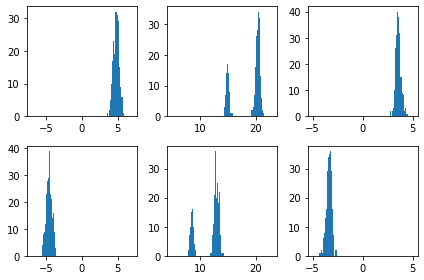

In [165]:
fig = plt.figure()

r = [[-7,7], [5,23], [-5,5]]

for i in range(1,7):
  fig.add_subplot(2, 3, i).hist(df.iloc[:,i-1], bins=100, range=r[i%3-1])

plt.tight_layout()
plt.show()

### Q3　トルク平均値データについて分析せよ / Analyze the data of average value of the torque.
  - 上段は正転時のトルクであり、下段は逆転時のトルクである
  - X軸（左列），Z軸（右列）は水平方向の駆動であるため、正転時と逆転時では大きさがほぼ同じで符号が逆のトルクとなっている
  - Y軸（中列）は鉛直方向の駆動であるため、逆転時（下降時）でも重力に逆らう方向（正）のトルクを発生させていなければならず、正転時と逆転時で符号が逆になっていない
  